# 10. Python에서의 파일 입출력
----

* 프로그램 도중에 다른 파일을 불러들이거나, 다른 파일로 결과를 기록하는 것은 흔한 일이다.  

* Python에서도 이를 위한 간편한 방법들을 제공한다.
   * text 파일과 그 외의 파일들을 모두 불러올 수 있다.
   
* 그 외의 여러가지 옵션을 통해, 파일을 읽어 들이는 방식 등을 조정할 수 있다.

## 파일 열기

* Python의 함수인 ```open```을 이용하여 파일을 열 수 있다.  
https://docs.python.org/3/library/functions.html#open
* 다음의 간단한 예제를 체크해 보자.
  * 이 예제의 ex1.csv 파일은 간단한 텍스트 파일로 다음의 내용을 가지고 있다.
  
a,b,c,d,message  
1,2,3,4,hello  
5,6,7,8,world  
9,10,11,12,foo  

In [1]:
a_file = open(file = 'ex1.csv', mode = 'r')

여기서 ```a_file```은 file object로서 사용자가 파일에 접근 및 조작할 수 있게 한다. 

```mode```는 어떤 목적으로 파일을 여는지 정하는 인자이다.

* ```r```: 읽기 전용
* ```r+```: 읽기와 쓰기
* ```w```: 쓰기 전용
* ```w+```: 쓰기 및 읽기
* ```a```: append
* ```a+```: append 및 읽기

읽은 파일이 텍스트 파일인 경우 ```.readline()``` method를 통해 한 줄씩 차례로 읽을 수 있다.

In [2]:
a_file.readline()

'a,b,c,d,message\n'

In [3]:
a_file.readline()

'1,2,3,4,hello\n'

In [4]:
a_file.readline()

'5,6,7,8,world\n'

In [5]:
a_file.readline()

'9,10,11,12,foo'

In [6]:
# 마지막 라인까지 모두 읽었음
a_file.readline()

''

작업을 마친 후에는 ```.close()``` method를 이용해 종료한다.

In [7]:
a_file.close()

위의 파일 라인별 read 과정은 반복 작업이라는 점에 착안하여 ```for```를 이용할 수 있다.

In [8]:
a_file = open(file = 'ex1.csv', mode = 'r')
for line in a_file.readlines():
    print(line)
a_file.close()

a,b,c,d,message

1,2,3,4,hello

5,6,7,8,world

9,10,11,12,foo


```a_file.readlines()```는 list이기 때문에 파일의 크기가 크면 메모리 문제가 생길 수 있다.

In [9]:
a_file = open(file = 'ex1.csv')
a_file.readlines()

['a,b,c,d,message\n', '1,2,3,4,hello\n', '5,6,7,8,world\n', '9,10,11,12,foo']

In [10]:
a_file.close()

따라서 일반적으로는 lazy loading인 다음의 방법을 사용한다.

In [11]:
a_file = open(file = 'ex1.csv')
for line in a_file:
    print(line)
a_file.close()

a,b,c,d,message

1,2,3,4,hello

5,6,7,8,world

9,10,11,12,foo


```.read()``` method를 이용해 모든 라인을 한 번에 읽을 수 있다.

In [12]:
a_file = open(file = 'ex1.csv', mode = 'r')
print(a_file.read())

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [13]:
# 작업 종료
a_file.close()

한편, 위의 file 경로에서는 상대 주소를 이용하였다. 즉, 현재 working directory에 존재하는 ex1.csv 파일을 불러온 것이다.  
물론 절대 경로를 이용하여 파일을 불러올 수도 있다. 이때는 해당 파일의 정확한 경로를 모두 ```file``` 인자로 전달하여야 한다.

그림 파일 등 텍스트 파일이 아닌 경우도 불러올 수 있다.

In [14]:
bfin = open(file = "yu_logo.png", mode = 'rb')

불러들인 ```bfin```를 여러 응용 방안에 활용할 수 있겠지만, 이 강의에서는 자세히 다루지는 않는다. 

다음과 같이 종료하여 마무리 하자.

In [15]:
bfin.close()

그림을 jupyter notebook에 보여주기 위한 목적이라면 다른 라이브러리를 이용해야 한다.

여러 방법이 있겠지만 ```matplotlib```를 이용해 본다.

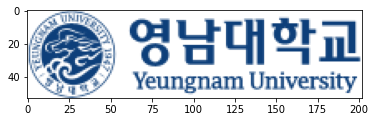

In [16]:
%matplotlib inline    
# 해당 모듈 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# 그림 읽어들이기
img = mpimg.imread('yu_logo.png') 
  
# 노트북에 출력하기
plt.imshow(img) 

## 파일 작성

* 파일에 텍스트를 작성할 때도 ```open``` 함수를 이용한다.
* 단, 이 경우에는 ```mode``` 인자가 ```w```가 된다.

In [17]:
fout = open("my_test.txt", "w")

fout.write('''
It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair,
we had everything before us, we had nothing before us,
we were all going direct to Heaven, we were all going direct the other way -
in short, the period was so far like the present period,
that some of its noisiest authorities insisted on its being received,
for good or for evil, in the superlative degree of comparison only.

Tale of Two Cities
by Charles Dickens
''')

fout.close()

다시 읽어 파일이 잘 저장되었는지 확인해 보자.

In [18]:
fin = open("my_test.txt", "r")
print(fin.read())
fin.close()


It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair,
we had everything before us, we had nothing before us,
we were all going direct to Heaven, we were all going direct the other way -
in short, the period was so far like the present period,
that some of its noisiest authorities insisted on its being received,
for good or for evil, in the superlative degree of comparison only.

Tale of Two Cities
by Charles Dickens



물론 jupyter notebook의 홈 화면에서 my_test.txt 파일이 생성된 것을 확인할 수 있다.

클릭하여 내용을 확인해 볼 수 있다.

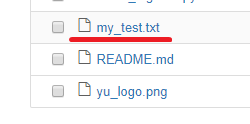

## ```with```

파일 사용을 마칠 때마다 ```close()```를 취하는 것이 번거롭다면 ```with```구문을 이용할 수 있다.

In [19]:
with open("my_test.txt") as fin:
    print(fin.read())


It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair,
we had everything before us, we had nothing before us,
we were all going direct to Heaven, we were all going direct the other way -
in short, the period was so far like the present period,
that some of its noisiest authorities insisted on its being received,
for good or for evil, in the superlative degree of comparison only.

Tale of Two Cities
by Charles Dickens



위 의 ```with``` 구문에서는 ```with```내의 블록 코드가 종료됨과 동시에, 파일을 자동으로 ```close``` 하여 준다.

따라서 파일 입출력 시에는 ```with``` 구문을 적극적으로 활용하는 것이 편리하다.

### 예제 : txt 파일을 읽고, 각 라인의 앞에 라인 번호 매기기

In [20]:
def add_nums(filename):
    result = []
    with open(filename) as fin:
        for num, line in enumerate(fin):
            result.append(str(num) + ". " + line)
    return result    

In [21]:
result = add_nums("my_test.txt")
result

['0. \n',
 '1. It was the best of times, it was the worst of times,\n',
 '2. it was the age of wisdom, it was the age of foolishness,\n',
 '3. it was the epoch of belief, it was the epoch of incredulity,\n',
 '4. it was the season of Light, it was the season of Darkness,\n',
 '5. it was the spring of hope, it was the winter of despair,\n',
 '6. we had everything before us, we had nothing before us,\n',
 '7. we were all going direct to Heaven, we were all going direct the other way -\n',
 '8. in short, the period was so far like the present period,\n',
 '9. that some of its noisiest authorities insisted on its being received,\n',
 '10. for good or for evil, in the superlative degree of comparison only.\n',
 '11. \n',
 '12. Tale of Two Cities\n',
 '13. by Charles Dickens\n']

다른 파일에 행 번호가 붙은 내용을 저장해 보자.

In [22]:
with open("my_test2.txt", "w") as fin:
    for line in result:
        fin.write(line)

### 예제 : 등장한 단어의 개수 세기

* ```.split()``` method를 이용하여, 각 단어를 공백 기준으로 나누어 list에 저장할 수 있다.
* ```.strip(',.')```는 단어의 마지막에 등장하는 쉼표나 마침표를 제거한다.
* 대소문자 구분없이 단어를 세려면 어떻게 해야 할까?

In [23]:
with open("my_test.txt") as fin:
    result = []
    for line in fin:
        words = line.split()
        for word in words:
            result.append(word.strip('.,'))

from collections import Counter
c = Counter(result)
print(c)

Counter({'the': 14, 'of': 13, 'was': 11, 'it': 9, 'we': 4, 'times': 2, 'age': 2, 'epoch': 2, 'season': 2, 'had': 2, 'before': 2, 'us': 2, 'were': 2, 'all': 2, 'going': 2, 'direct': 2, 'in': 2, 'period': 2, 'its': 2, 'for': 2, 'It': 1, 'best': 1, 'worst': 1, 'wisdom': 1, 'foolishness': 1, 'belief': 1, 'incredulity': 1, 'Light': 1, 'Darkness': 1, 'spring': 1, 'hope': 1, 'winter': 1, 'despair': 1, 'everything': 1, 'nothing': 1, 'to': 1, 'Heaven': 1, 'other': 1, 'way': 1, '-': 1, 'short': 1, 'so': 1, 'far': 1, 'like': 1, 'present': 1, 'that': 1, 'some': 1, 'noisiest': 1, 'authorities': 1, 'insisted': 1, 'on': 1, 'being': 1, 'received': 1, 'good': 1, 'or': 1, 'evil': 1, 'superlative': 1, 'degree': 1, 'comparison': 1, 'only': 1, 'Tale': 1, 'Two': 1, 'Cities': 1, 'by': 1, 'Charles': 1, 'Dickens': 1})


## `pandas`와 `DataFrame`

* ```pandas```는 ```Numpy```을 기초로 하여 만들어진 python library로 table 모양의 데이터를 불러오고 처리하는 작업에 탁월한 성능을 보인다.
* Table 모양 (직사각형의 표 형태)의 데이터 구조를 ```DataFrame```이라고 부른다.
* 이 단원에서는 ```pandas```를 이용하여 표 형태의 데이터를 불러오는 방법에 대해 알아본다.
  * 앞에서 이용한 ex1.csv 파일 또한 표 형태의 데이터 중 하나라고 볼 수 있다.
* 표 형태의 데이터 처리에 관한 여러 방법은 통계데이터베이스 과목에서 배운다.

| 함수| 설명|
|:-----------|:----------------------------------------------------------------------------------------------------|
| ```read_csv```| 콤마(,)로 구분된 파일을 불러와 DataFrame 객체로 변환|
| ```read_table```| 여러가지 형태의 구분자로 구분된 파일을 불러와 DataFrame 객체로 변환, 기본은 탭('\t') 구분자를 이용 |
| ```read_fwf```| 고정 길이 컬럼 포맷 데이터를 불러들임|

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv("ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


만약 원본 파일에 컬럼 이름이 없을 경우 ```header=None``` 옵션을 추가한다.

In [26]:
pd.read_csv("ex2.csv", header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


표 형태의 데이터는 ```DataFrame``` 객체로 만들어 csv 등의 파일로 쉽게 저장할 수 있다.
* 다음은 ```dictionary```로부터 ```DataFrame```을 만들고 최종적으로 파일로 저장하는 과정이다.
* ```scores```의 key는 컬럼 이름을 나타내고, value는 각 컬럼의 값을 나타낸다.

In [27]:
scores = {'name': ["Tom", "Lia", "Anne", "Bill"], "score": [50, 60, 40, 70]}
scores

{'name': ['Tom', 'Lia', 'Anne', 'Bill'], 'score': [50, 60, 40, 70]}

In [28]:
# DataFrame으로 변환하여 보기 좋게 만듦
df_scores = pd.DataFrame(data=scores)
df_scores

,name,score
0,Tom,50
1,Lia,60
2,Anne,40
3,Bill,70


csv 파일로 저장한 후, Jupyter 파일 탐색기 화면에서 결과를 확인해 보자.
* ```index=False``` 옵션을 사용하면 행 index는 저장하지 않는다.

In [29]:
df_scores.to_csv("scores.csv", index=False)

## JSON data

JSON 파일은 HTTP 상에서 데이터를 전송할 때 많이 사용되는 파일 포맷으로, python dictionary와 유사하게 생겼다.

In [30]:
import json
with open('example.json') as json_file:
    customer_data = json.load(json_file)

In [31]:
customer_data

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [32]:
type(customer_data)

dict